# Image Processing

## Load Data

In [3]:
#!pip install sk-video
#!pip install Pillow

#from google. colab import files
#uploaded = files. upload()

<class 'numpy.ndarray'>
(333, 500, 3)


array([[ 69,  71,  72, ..., 116, 114, 115],
       [ 67,  68,  69, ..., 117, 116, 115],
       [ 67,  67,  66, ..., 121, 119, 120],
       ...,
       [ 99,  96,  95, ...,  74,  72,  70],
       [ 94,  95,  95, ...,  75,  74,  74],
       [ 92,  94,  94, ...,  72,  71,  70]], dtype=uint8)

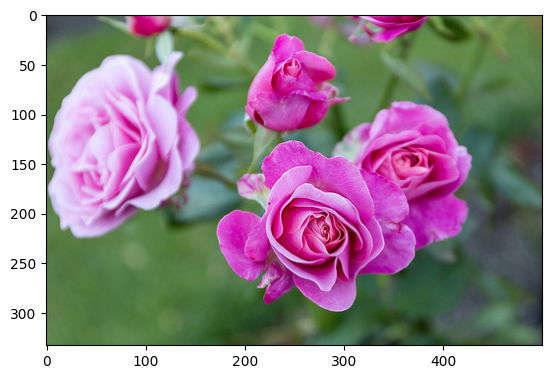

In [4]:
from PIL import Image
from numpy import asarray
from matplotlib import image
from matplotlib import pyplot

# load the image
image = Image.open('data/Flowers for image classification.png')

# convert image to numpy array
data = asarray(image)
print(type(data))

# summarize shape
print(data.shape)

display(data[:,:,0])

# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

## Use entire range of data?

In [5]:
print("R ranges between ", data[:,:,0].max(), data[:,:,0].min())
print("B ranges between ", data[:,:,1].max(), data[:,:,1].min())
print("G ranges between ", data[:,:,2].max(), data[:,:,2].min())

R ranges between  255 9
B ranges between  249 0
G ranges between  255 0


## Filtering

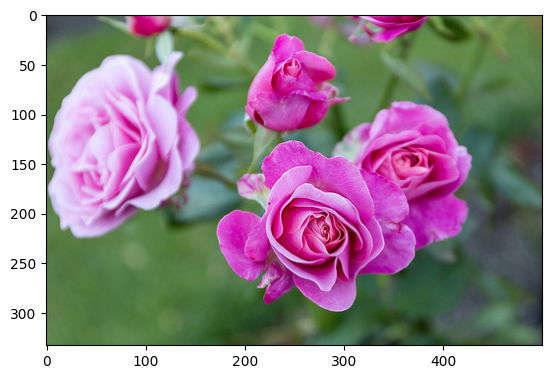

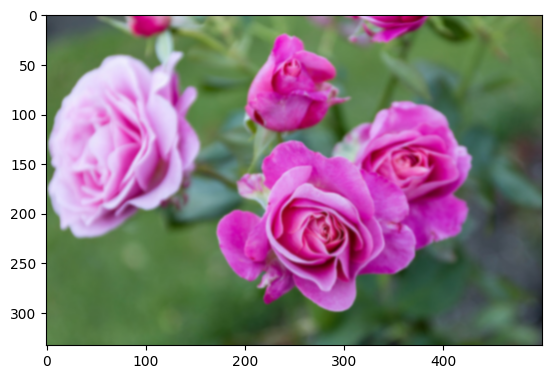

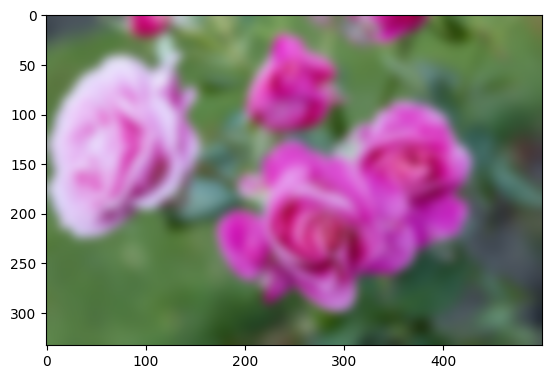

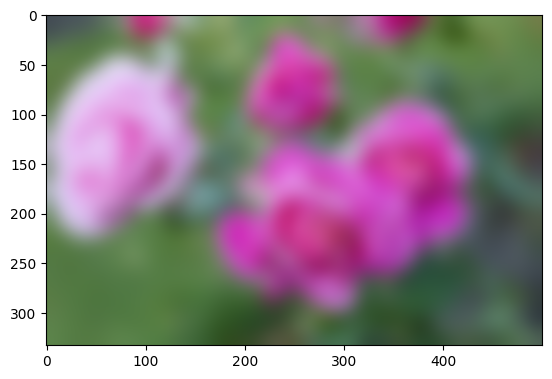

In [6]:
from scipy.ndimage import gaussian_filter

sigmas = [0, 1, 5, 10]
for std in sigmas:
  data_filtered = gaussian_filter(data, sigma=std)

  for c in [0,1,2]:
    data_filtered[:,:,c] = gaussian_filter(data[:,:,c], sigma=std)

  pyplot.imshow(data_filtered)
  pyplot.show()

## K-Means: flower vs not flower

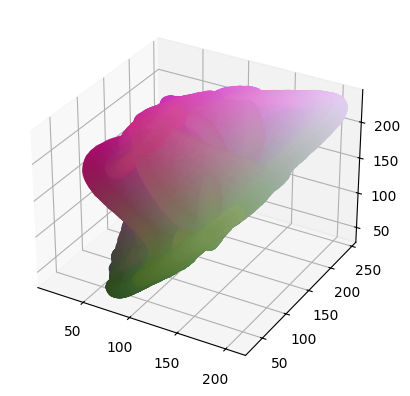

In [7]:
from matplotlib import pyplot as plt

pixel_array = data_filtered.reshape(data.shape[0]*data.shape[1], 3) 
pixel_array

fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = pixel_array[:, 0]
xdata = pixel_array[:, 1]
ydata = pixel_array[:, 2]
pixel_array
ax.scatter3D(xdata, ydata, zdata, s=100, facecolor=pixel_array/255);

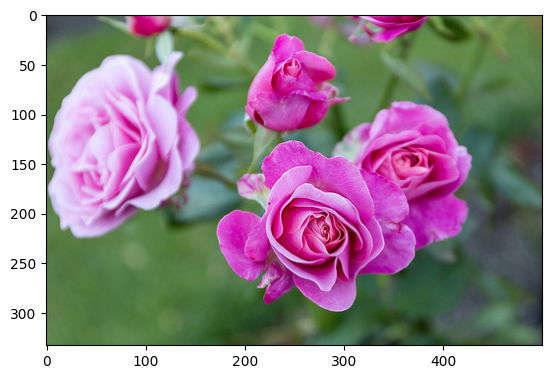

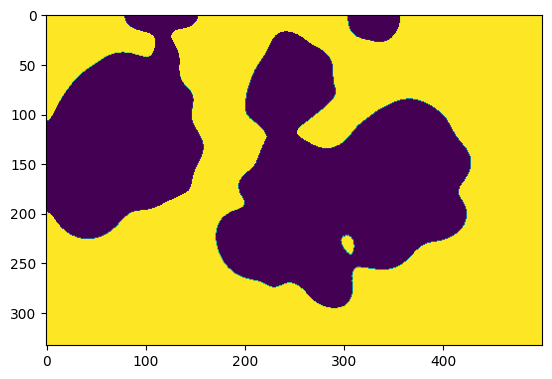

In [8]:
# Clustering by the color only
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(pixel_array)
data_labels = kmeans.labels_
data_labels.shape

data_labels = data_labels.reshape(data.shape[0], data.shape[1])
data_labels.shape

pyplot.imshow(data)
pyplot.show()

pyplot.imshow(data_labels*255)
pyplot.show()

In [9]:
# We can use the positons as well
import numpy as np 

indices = np.array(list(np.ndindex(data[:,:,1].shape)))
indices
np.concatenate([pixel_array, indices], axis=1)

array([[ 67,  76,  84,   0,   0],
       [ 67,  76,  84,   0,   1],
       [ 67,  76,  84,   0,   2],
       ...,
       [ 77,  98,  84, 332, 497],
       [ 77,  97,  84, 332, 498],
       [ 77,  97,  84, 332, 499]])

FIltered with sigma 0


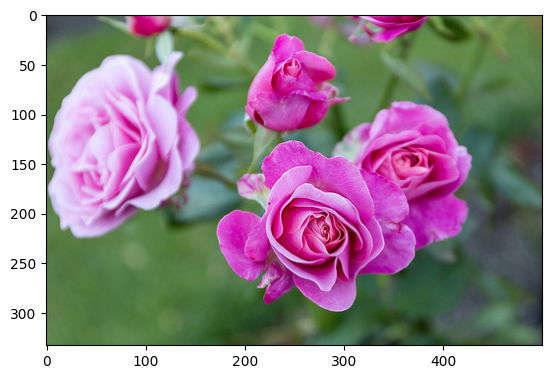

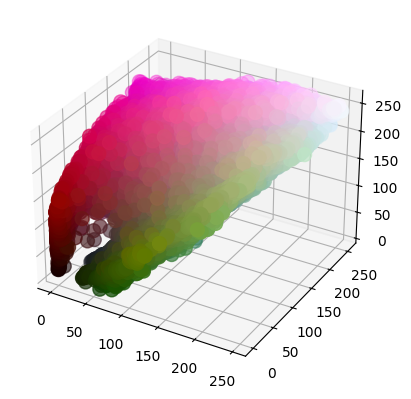

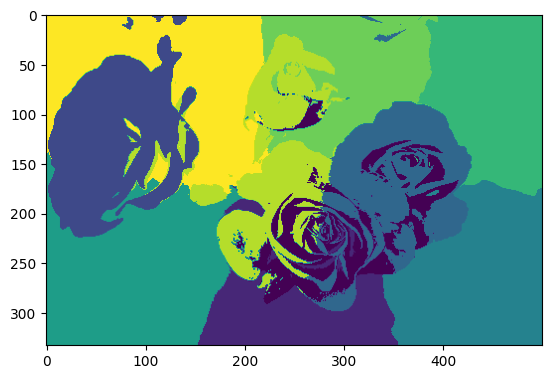





FIltered with sigma 1


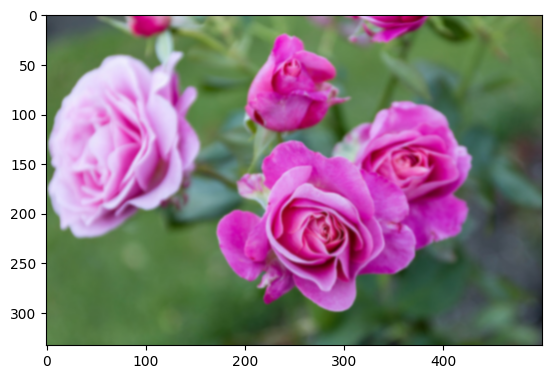

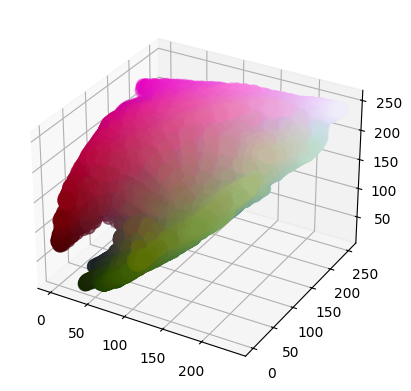

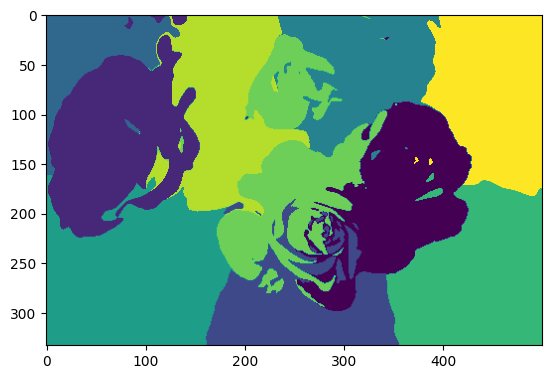





FIltered with sigma 5


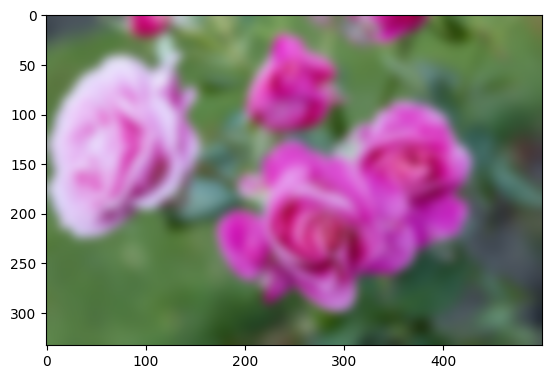

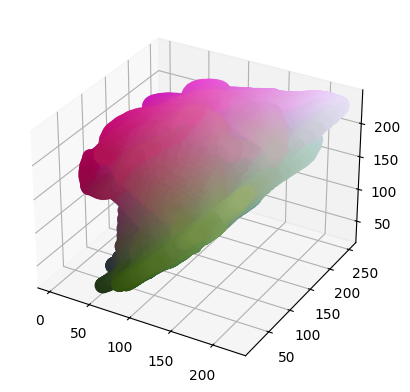

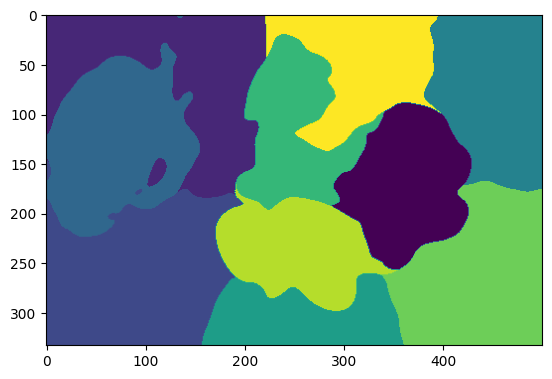





FIltered with sigma 10


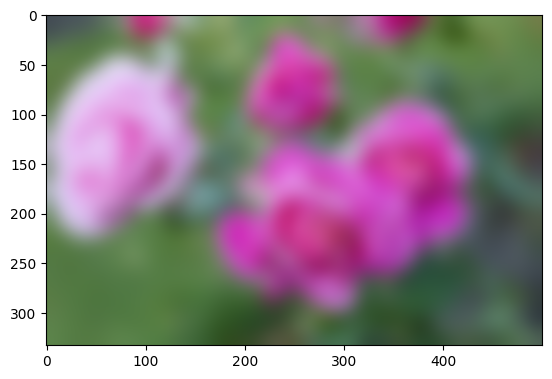

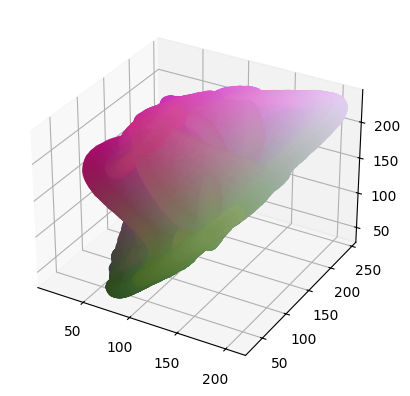

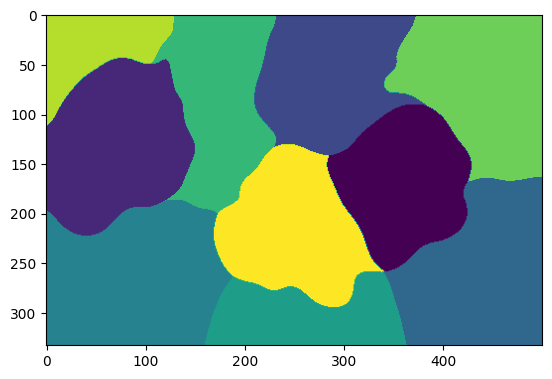

In [10]:
## Lets see it all together:
from scipy.ndimage import gaussian_filter
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

# Give 5 features to the kmeans: r,g,b,x,y when considering several clusters
#indices = np.array(list(np.ndindex(data[:,:,1].shape)))
#np.concatenate([pixel_array, indices], axis=1)

sigmas = [0, 1, 5, 10]
for std in sigmas:
  #data_filtered = gaussian_filter(data, sigma=std)

  for c in [0,1,2]:
    data_filtered[:,:,c] = gaussian_filter(data[:,:,c], sigma=std)

  pixel_array = data_filtered.reshape(data.shape[0]*data.shape[1], 3) 

  #kmeans = KMeans(n_clusters=2, random_state=0).fit(pixel_array)
  kmeans = KMeans(n_clusters=10, random_state=0).fit(np.concatenate([pixel_array, indices], axis=1))
  data_labels = kmeans.labels_

  data_labels = data_labels.reshape(data.shape[0], data.shape[1])

  #### DISPLAY THE PICTURE ####
  print(f'FIltered with sigma {std}')
  fig1 = plt.figure()
  pyplot.imshow(data_filtered)
  pyplot.show()

  #### DISPLAY THE PIXELS ####
  fig2 = plt.figure()
  ax = plt.axes(projection='3d')

  # Data for three-dimensional scattered points
  zdata = pixel_array[:, 0]
  xdata = pixel_array[:, 1]
  ydata = pixel_array[:, 2]
  ax.scatter3D(xdata, ydata, zdata, s=100, facecolor=pixel_array/255);

  #### DISPLAY THE LABEL ####
  fig3 = plt.figure()
  pyplot.imshow(data_labels/data_labels.max()*255)
  pyplot.show()

  print('\n\n\n')

## Segmentation

libpng warning: iCCP: known incorrect sRGB profile


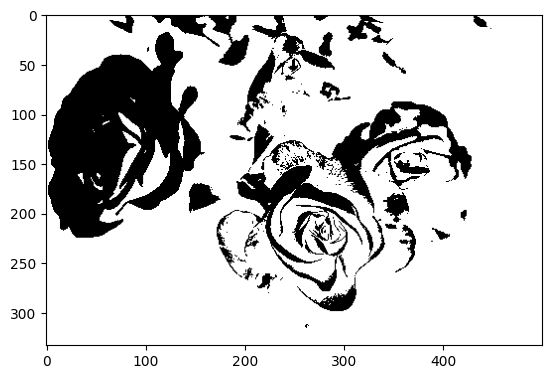

In [11]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('data/Flowers for image classification.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')
plt.show()

## Feature Extraction

In [12]:
import pandas as pd

# Give 5 features to the kmeans: r,g,b,x,y when considering several clusters
indices = np.array(list(np.ndindex(data[:,:,1].shape)))


data_labels = kmeans.labels_ # shaped like (100000, 1) again
data_labels = data_labels.reshape(data_labels.shape[0], 1)
data_labels.shape

features = np.concatenate([pixel_array, indices, data_labels], axis=1)
features.shape
features

features = pd.DataFrame(data=features, columns = ['R', 'G', 'B','x', 'y', 'Label'])
features.head()

,R,G,B,x,y,Label
0,67,76,84,0,0,8
1,67,76,84,0,1,8
2,67,76,84,0,2,8
3,67,76,84,0,3,8
4,67,77,85,0,4,8


In [13]:
# Now it is a matter of being creative...

# SIZE
features.groupby(['Label'], as_index=True)[['R']].count()

# Mean color
features.groupby(['Label'], as_index=True)[['R', 'G', 'B']].mean()

# Mean std
features.groupby(['Label'], as_index=True)[['R', 'G', 'B']].std()

# MAX x and Y
features.groupby(['Label'], as_index=True)[['x', 'y']].agg(['max', 'min'])

# and many more! we could do:
#     -> avg distance between all the pixels
#     -> how close is it to a circle
#     -> etc etc etc 

x         y     
       max  min  max  min
Label                    
0      258   91  428  283
1      222   44  149    0
2      141    0  382  210
3      332  164  499  341
4      332  187  187    0
5      332  259  363  160
6      199    0  231  106
7      168    0  499  341
8      111    0  129    0
9      294  131  340  169

# Practical example of a DNN

In [14]:
#pip install --upgrade keras

In [15]:
# We import torch & TF so as to use torch Dataloaders & tf.data.Datasets.
#import torch
import tensorflow as tf

import os
import numpy as np
import keras
from keras import layers
from keras import ops
import matplotlib.pyplot as plt
import plotly.express as px

2024-08-13 17:08:43.063613: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [17]:
num = 10
images = X_train[:num]
labels = Y_train[:num]

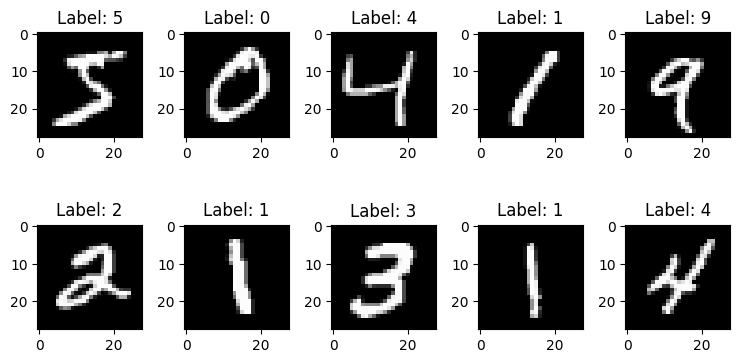

In [18]:
num_row = 2
num_col = 5

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [19]:
# Function return digit in grayscale
def plot_digit(digit, dem = 28, font_size = 12):
    max_ax = font_size * dem

    fig = plt.figure(figsize=(13, 13))
    plt.xlim([0, max_ax])
    plt.ylim([0, max_ax])
    plt.axis('off')
    black = '#000000'

    for idx in range(dem):
        for jdx in range(dem):

            t = plt.text(idx * font_size, max_ax - jdx*font_size, digit[jdx][idx], fontsize = font_size, color = black)
            c = digit[jdx][idx] / 255.
            t.set_bbox(dict(facecolor=(c, c, c), alpha = 0.5, edgecolor = 'black'))

    plt.show()

1


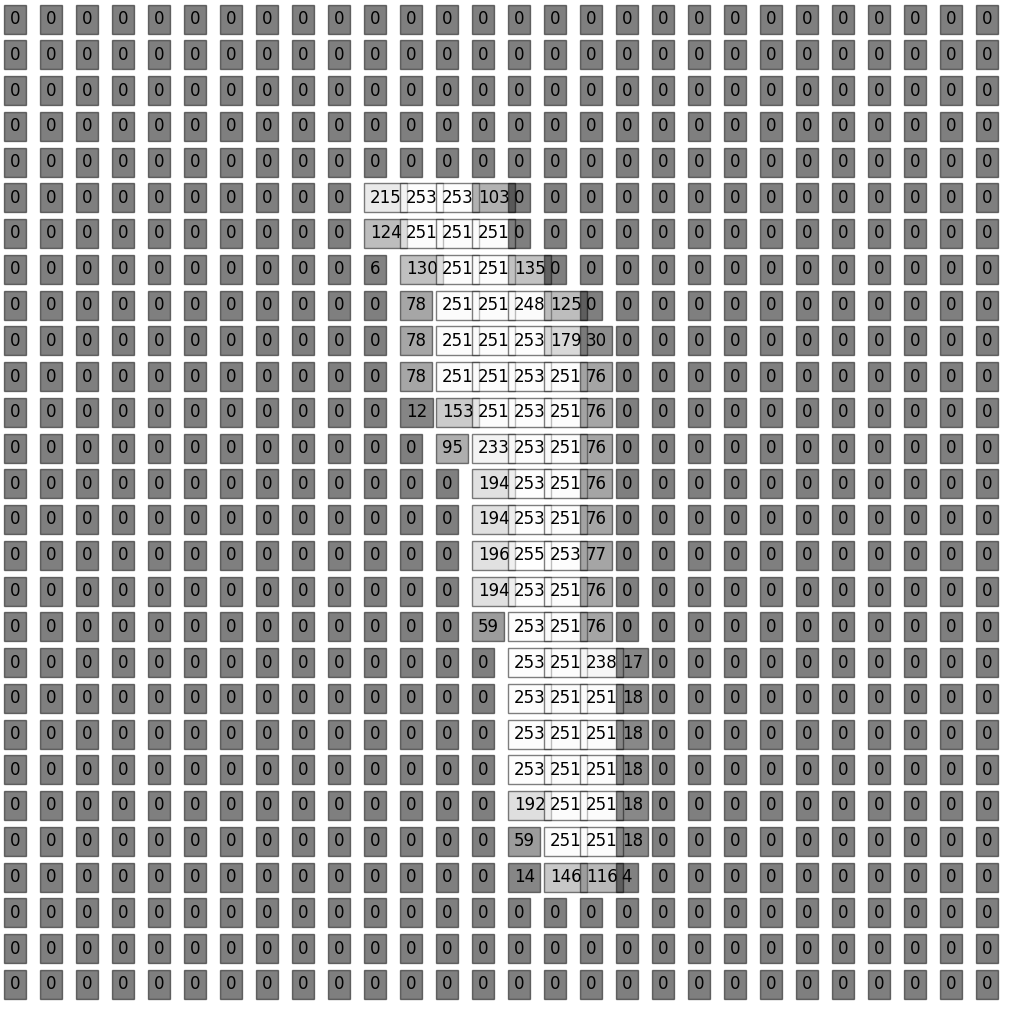

In [20]:
rand_number = np.random.randint(0, len(Y_train))
print(Y_train[rand_number])
plot_digit(X_train.reshape(-1, 28, 28)[rand_number])

In [21]:
inputs = keras.Input(shape=(784,), name="digits") #28*28
x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

Here's what the typical end-to-end workflow looks like, consisting of:

- Training
- Validation on a holdout set generated from the original training data
- Evaluation on the test data

In [22]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

We specify the training configuration (optimizer, loss, metrics):

In [23]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

We call `fit()`, which will train the model by slicing the data into "batches" of size
`batch_size`, and repeatedly iterating over the entire dataset for a given number of
`epochs`.

In [24]:
print("Fit model on training data")
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=10,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val),
)

Fit model on training data
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5600 - sparse_categorical_accuracy: 0.8480 - val_loss: 0.1775 - val_sparse_categorical_accuracy: 0.9492
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1744 - sparse_categorical_accuracy: 0.9491 - val_loss: 0.1450 - val_sparse_categorical_accuracy: 0.9590
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1232 - sparse_categorical_accuracy: 0.9636 - val_loss: 0.1223 - val_sparse_categorical_accuracy: 0.9644
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0975 - sparse_categorical_accuracy: 0.9722 - val_loss: 0.1222 - val_sparse_categorical_accuracy: 0.9642
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0807 - sparse_categorical_accuracy: 0.9746 - val_loss: 0.1142 - val_sparse_categorical_accuracy: 0.9688
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0663 - sparse_categorical_accuracy: 0.9798 - val_loss: 0.1057 - val_sparse_catego

The returned `history` object holds a record of the loss values and metric values
during training:

In [25]:
print(history.history)

{'loss': [0.3409891724586487, 0.16316401958465576, 0.12168016284704208, 0.09701136499643326, 0.08162742108106613, 0.06929588317871094, 0.05898837745189667, 0.05273627117276192, 0.04627181962132454, 0.039754051715135574], 'sparse_categorical_accuracy': [0.9036200046539307, 0.9514399766921997, 0.9637399911880493, 0.9712600111961365, 0.9748799800872803, 0.9788600206375122, 0.9819200038909912, 0.9837200045585632, 0.9859399795532227, 0.9872199892997742], 'val_loss': [0.17752893269062042, 0.1450497955083847, 0.12225285917520523, 0.12217828631401062, 0.11423663049936295, 0.10566375404596329, 0.10993729531764984, 0.10672475397586823, 0.10710003972053528, 0.11351095139980316], 'val_sparse_categorical_accuracy': [0.9491999745368958, 0.9589999914169312, 0.9643999934196472, 0.9642000198364258, 0.9688000082969666, 0.970300018787384, 0.9706000089645386, 0.9732000231742859, 0.972100019454956, 0.9728999733924866]}


We evaluate the model on the test data via `evaluate()`:

In [26]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1187 - sparse_categorical_accuracy: 0.9704
test loss, test acc: [0.10819388180971146, 0.9728999733924866]
Generate predictions for 3 samples
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
predictions shape: (3, 10)
